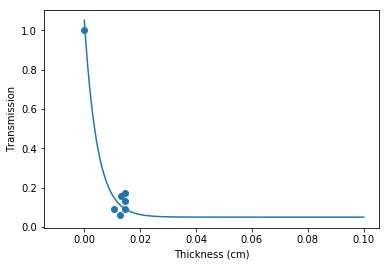

[0.06028223 0.13104567 0.09128483 0.17160231 0.09090431 0.15545486
 1.        ]
alpha = 217.26775163434152
c = 0.05042104964617416


In [39]:
%matplotlib inline

# Code to calculate absorption coefficient and reflection values for polymer films using control polymer film thickness
# and transmission measurements

#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit

# Load fixed control data, meaning non-sample data has been removed. Enter measured thicknesses in mm, convert to cm
path = 'C:\\Users\\acarr.BNL\\Documents\\Data\\Optical Transmission\\Polymer_Backgrounds\\'
samp = 'p_PE_hexane_'
transmission = []
thickness = np.asarray([0.128, 0.147, 0.145, 0.145, 0.105, 0.132, 0])/10

# Loop over all control data. Load transmisison data, collect average of all data, and place into transmission array
for n in range(1,7):
    name = samp + str(n)
    polymer_bkg = pd.read_csv(path + name + '_2slides_fixed.csv')
    transmission.append(polymer_bkg.mean().mean())
transmission.append(1)

# Initial params for fitting process
transmission = np.asarray(transmission)
init_alpha = 0.1
init_c = 0.9
init_params = [init_alpha, init_c]

# Define transmission function to use during fitting
def trans_curve(x, alpha, c):
    # where x is film thickness [cm], y is optical transmission, aplha is absorption coefficient [1/cm], and c is both
    # back and front reflection plus other constants
    # alpha = 103.85
    return(c + np.exp(-alpha*x))

# Fit measured transmission and thickness values to curve to obtain absorption coefficient and reflection for each polymer
# Save fitted params to be used as background data for experimental measurements
params, cov = curve_fit(trans_curve, thickness, transmission, p0=init_params)
file = path + samp + 'fit_params.csv'
np.savetxt(file, params, delimiter = ',')
plt.scatter(thickness, transmission)
plt.plot(np.linspace(0, 0.1, 100000), trans_curve(np.linspace(0, 0.1, 100000), params[0], params[1]))
plt.ylabel('Transmission')
plt.xlabel('Thickness (cm)')
plt.show()

print(transmission)
print('alpha = ' + str(params[0]))
print('c = ' + str(params[1]))